In [1]:
import torch
import torchvision

torchvison.transforms:常用的图像预处理方法  
* 数据中心化
* 数据标准化
* 缩放
* 裁剪
* 旋转
* 翻转
* 填充
* 噪声添加
* 灰度变换
* 线性变换
* 仿射变换
* 亮度，饱和度，对比度变换

torchvision.transforms.Normalize()
功能：逐通道的对图像进行标准化  
output = （input -mean)/std  
* mean:各通道的均值
* std: 各通道的方差
* inplace：是否原地操作  
加速模型的收敛

In [2]:
from torchvision import transforms

transforms.CenterCrop()  
功能：从图像中心裁剪图片
* size：所需裁剪图片的尺寸

transforms.RandomCrop()  
* size 所需裁剪图片的尺寸
* padding:设置填充大小  
    当为a,时，上下左右均填充a个像素  
    （a,b)时，上下填充b,左右填充a   
    (a,b,c)时，左右上下，分别填充a,b,c  
* pad_if_need:若图像小于设定size，则填充
* padding_mode:填充模式，有4种模式  
1，constant：像素值由fill设定  
2，edge:像素值由图像边缘像素决定 
3,reflect:镜像填充，最后一个像素不镜像，eg:[1,2,3,4]->[3,2,1,2,3,4,3,2]  
4,symmetric:镜像填充，最后一个像素镜像，eg:[1,2,3,4]->[2,1,1,2,3,4,4,3]  
5,fill:constant时，这只填充的像素值

transforms.RandomResizedCrop()  
* 随机大小，长宽比裁剪图片
* sacle:随机裁剪面积比例，默认（0.08,1）
* ratio:随机长宽比，默认（3/4,4/3）
* interpolation :差值方法

transforms.RandomVerticalFlip,transforms.RandomHorizontalFlip  
依概率水平或者垂直翻转图片  
* p :翻转的概率

transforms.RandomRotation()  
功能：随机旋转图片  
* degrees:旋转角度
* resample:重采样方法
* expand:是否扩大图片

In [3]:
from my_data import Mydata
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt


In [4]:
data_dir = '/home/zhanggong-study/pytorch_tutorial/RMB_data'

In [43]:
train_transform = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize((224,224)),
    #1.CenterCrop
#     transforms.CenterCrop(196),
    #2.RandomCrop
#     transforms.RandomCrop(224,padding=16),
#     transforms.RandomCrop(224,padding=(16,64)),
#     transforms.RandomCrop(224,padding=16,fill=(255,0,0)),
#     transforms.RandomCrop(512,pad_if_needed=True),
#     transforms.RandomCrop(224,padding=64,padding_mode='edge'),
#     transforms.RandomCrop(224,padding=64,padding_mode='reflect'),
#     transforms.RandomCrop(1024,padding=1024,padding_mode='symmetric'),
    # 3 RandomResizedCrop
#     transforms.RandomResizedCrop(size=224,scale=(0.08,1)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
    Resize(224,224),
    transforms.ToTensor()
])

In [44]:
train_dataset = Mydata(data_dir,annotation_dir='/home/zhanggong-study/pytorch_tutorial/RMB_data/train.txt',transform=train_transform)
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)

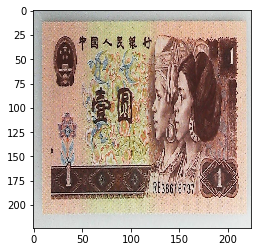

In [45]:
for i,data in enumerate(train_loader):
    if i==0:
        inputs,labels =data['image'],data['label']
        img_tensor = inputs[0,...]
        img =img_tensor.transpose(0,2).transpose(0,1)
        plt.imshow(img)

In [20]:
img.shape

torch.Size([224, 224, 3])

可以看到 在图片中间裁剪出196*196

重点：自定义transform

In [33]:
import cv2

In [41]:
class Resize(object):
    def __init__(self,w,h):
        self.w= w
        self.h = h
    def __call__(self,image):
        '''
        resize操作
        '''
        img = cv2.resize(image,(self.w,self.h))
        return img

在计算机视觉领域，一般都会自己定义增强的方法，在增强的同时还需要对标签处理